# Load data

In [1]:
# import functions
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import numpy as np
from imageio import imread
from os import listdir
from os.path import isfile, join
from google.colab import drive
import os
from numpy import *

# define image size
image_size=450

# load the InceptionV3 model
Incep = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
Incep.summary()

# set the working path to drive contenent 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/SAR')
!pwd

# define paths to the training and validation datasets
path_train = "training/"
path_validation = "validation/"

# class names
classes = ['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
classes_num=np.arange(10)

# initialization
X_train = []
y_train = []
X_validation = []
y_validation = []

# loop on images
for j in range(len(classes)):
    path = path_train + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    
    # training
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        X_train.append(tmp[0:450,0:450:,0:3])
        y_train.append(classes_num[j])
  
    # validation
    path = path_validation + classes[j]
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for i in range(len(files)):
        tmp = imread(path + '/' + files[i])
        X_validation.append(tmp[0:450,0:450:,0:3])
        y_validation.append(classes_num[j])
        
# transform to array
X_train = asarray(X_train)
y_train = asarray(y_train)
X_validation = asarray(X_validation)
y_validation = asarray(y_validation)

# convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_validation = keras.utils.to_categorical(y_validation, 10)

# freeze layers-n
# n=2
# for layer in Incep.layers[:-2]:
#     layer.trainable = False
 
# check the trainable status of the individual layers
# for layer in vgg_conv.layers:
#   print(layer, layer.trainable)

Using TensorFlow backend.















87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 450, 450, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 32) 0           batch_normalization_1[0][0]      
_________

In [108]:
len(Incep.layers)

311

In [0]:
Incep.summary()

# Build the network

In [0]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from keras.layers import Dense, Dropout, Input
from keras import optimizers,models,layers

# build the model
model = models.Sequential()
# add inception
model.add(Incep)
# add a first layer 
model.add(MaxPooling2D(pool_size=(8,8)))
# flatten for dense layer
model.add(layers.Flatten())
# add softmax 
model.add(Dense(10, activation='softmax'))
# compile the model 
model.compile(optimizer=optimizers.Adadelta(lr=1e-2),
              loss='categorical_crossentropy',
               metrics=['acc'])

In [0]:
model.summary()

# Fit the network

In [11]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=20,
                    validation_data=(X_validation, y_validation))

Train on 1120 samples, validate on 480 samples
Epoch 1/10
1120/1120 [==============================] - 44s 40ms/step - loss: 0.0110 - acc: 0.9982 - val_loss: 0.4503 - val_acc: 0.8771
Epoch 2/10
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0106 - acc: 0.9991 - val_loss: 0.4664 - val_acc: 0.8729
Epoch 3/10
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.4625 - val_acc: 0.8729
Epoch 4/10
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0107 - acc: 0.9982 - val_loss: 0.4598 - val_acc: 0.8687
Epoch 5/10
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0147 - acc: 0.9955 - val_loss: 0.4616 - val_acc: 0.8687
Epoch 6/10
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0074 - acc: 0.9991 - val_loss: 0.4604 - val_acc: 0.8667
Epoch 7/10
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0115 - acc: 0.9982 - val_loss: 0.4805 - val_acc: 0.8625
E

# Decrease the learning rate

In [12]:
model.compile(optimizer=optimizers.Adadelta(lr=1e-4),
              loss='categorical_crossentropy',
               metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=20,
                    validation_data=(X_validation, y_validation))

Train on 1120 samples, validate on 480 samples
Epoch 1/5
1120/1120 [==============================] - 73s 66ms/step - loss: 0.0111 - acc: 0.9982 - val_loss: 0.4792 - val_acc: 0.8625
Epoch 2/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.4822 - val_acc: 0.8625
Epoch 3/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0095 - acc: 0.9964 - val_loss: 0.4812 - val_acc: 0.8625
Epoch 4/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4829 - val_acc: 0.8625
Epoch 5/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.4822 - val_acc: 0.8646


# Evaluate model performances

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# compute the score 
score = model.evaluate(X_validation , y_validation, verbose=0)

# predict the X_validation
y_prediction = model.predict(X_validation)
y_prediction=np.argmax(y_prediction,axis=1)
y_prediction=keras.utils.to_categorical(y_prediction, 10)

# compute confusion matrix
ConfMat=confusion_matrix(np.argmax(y_validation,axis=1), np.argmax(y_prediction,axis=1))
print('The accuracy value = ',str(round(score[1],2)))
#print('The loss value = ',str(score[0]))

# plot confusion matrix 



The accuracy value =  0.86


/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


Normalized confusion matrix


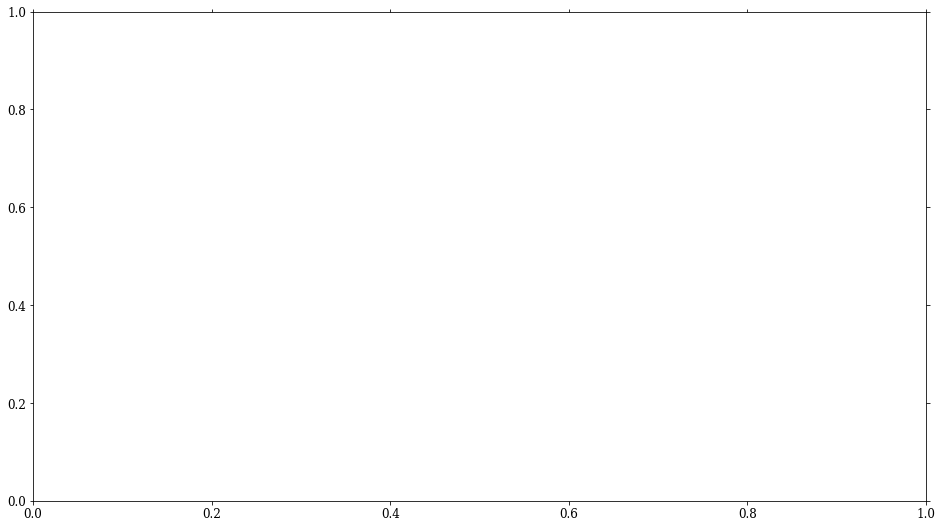

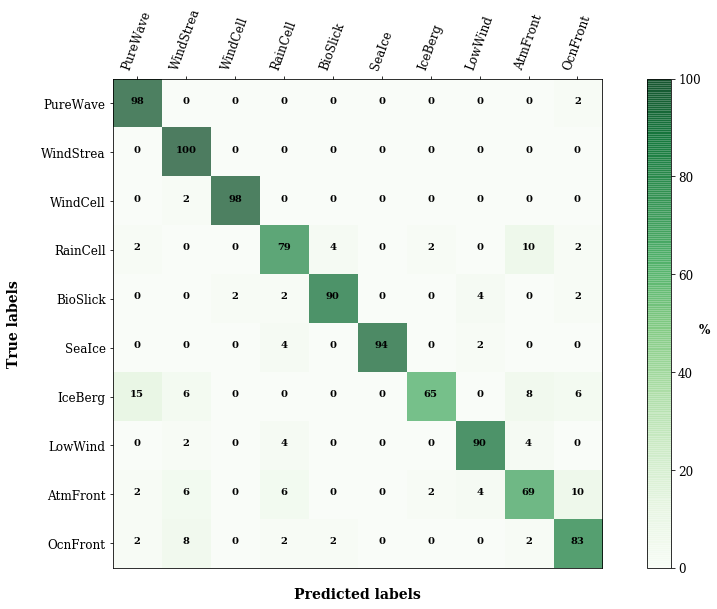

In [131]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools


# define some matplotlib parameters
plt.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams.update({'font.family': 'serif','text.latex.unicode':True,'axes.labelsize': 'large',
             'axes.labelweight':'bold',
             'axes.titlesize':'large',
             'axes.titleweight':'bold',
             'xtick.labelsize':12,
             'ytick.labelsize':12}) 

plt.tick_params(top='on',bottom='off',left='on',right='off')
plt.rc('font', family='serif')
# classes names 
Names=['F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
# classes true names 
TrueNames=['PureWave', 'WindStrea', 'WindCell', 'RainCell', 'BioSlick', 'SeaIce', 'IceBerg', 'LowWind', 'AtmFront' ,'OcnFront']
AllClasses=np.arange(10)
dic=dict(zip(Names,TrueNames))

ConfMat = ConfMat.astype('float') / ConfMat.sum(axis=1)[:, np.newaxis]*100
#print("Normalized confusion matrix")
Max=100
Name="ConfMatNormalized"
unit=r'%'
#print(ConfMat)
fig, ax = plt.subplots()
cax = ax.matshow(ConfMat, vmin=0, vmax=Max,cmap='Greens',alpha=0.7)
cbar=fig.colorbar(cax)
cbar.ax.set_ylabel(str(unit), rotation=0)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, [dic[x] for x in Names],rotation=70)
plt.yticks(tick_marks, [dic[x] for x in Names])
ax.tick_params(top='True', bottom='False')
fmt = '.0f'
thresh = ConfMat.max() / 2.
for i, j in itertools.product(range(ConfMat.shape[0]), range(ConfMat.shape[1])):
    plt.text(j, i, format(ConfMat[i, j], fmt),
              horizontalalignment="center",weight="bold",
              color= "black")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('top')
plt.ylabel('True labels',fontweight='bold',fontsize=14,labelpad=20)
plt.xlabel('Predicted labels',fontweight='bold',fontsize=14,labelpad=20)
plt.show()

# save confusion matrix to drive
plt.savefig("/content/drive/My Drive/ConfMat_InceptionV3.jpg", bbox_inches='tight',dpi=300)
plt.close()